<a href="https://colab.research.google.com/github/Vaaya1176/Iris-Dataset-/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Convert the dataset into a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Displaying the first 5 rows
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

# Checking for missing values
print("\nMissing values in the dataset:")
print(iris_df.isnull().sum())

# Generating basic descriptive statistics
print("\nDescriptive Statistics:")
print(iris_df.describe())

# Data types of each column
print("\nData Types:")
print(iris_df.dtypes)


First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435

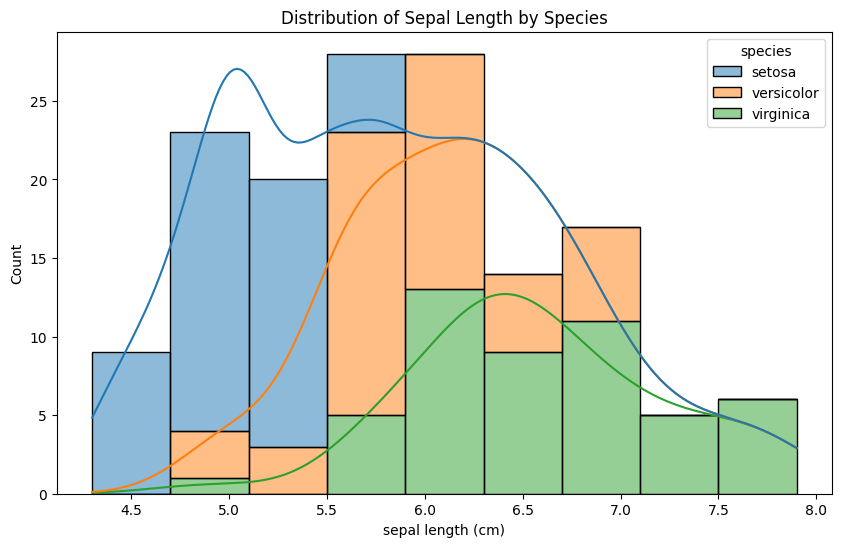

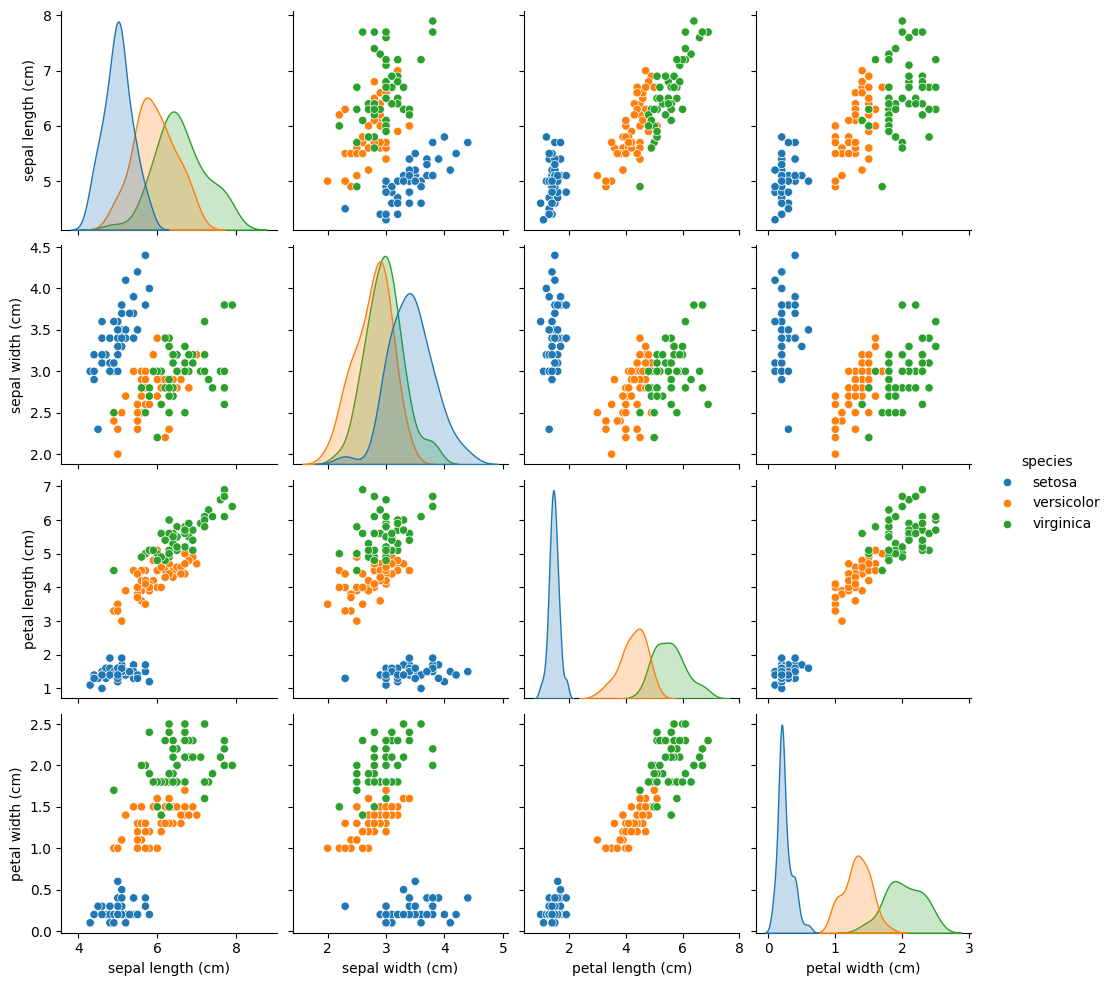

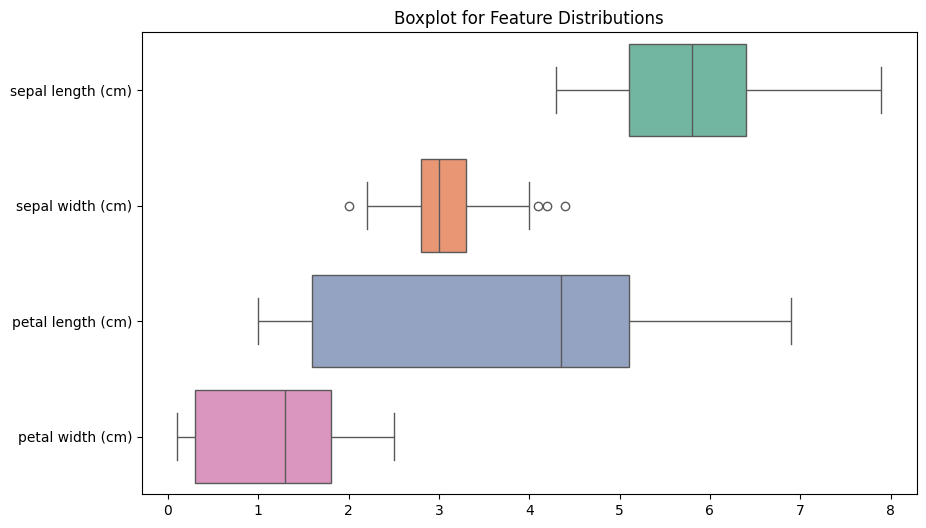

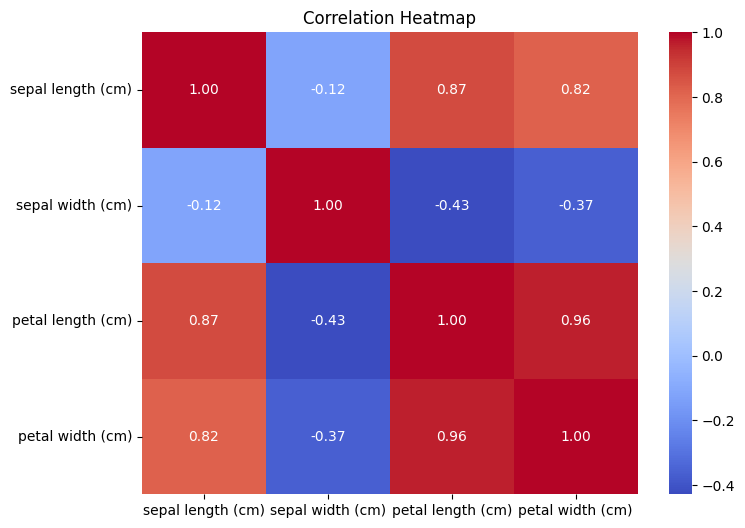

In [2]:
# Visualizing the dataset distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x='sepal length (cm)', hue='species', kde=True, multiple="stack")
plt.title('Distribution of Sepal Length by Species')
plt.show()

# Pairplot for relationships
sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, orient='h', palette='Set2')
plt.title('Boxplot for Feature Distributions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = iris_df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


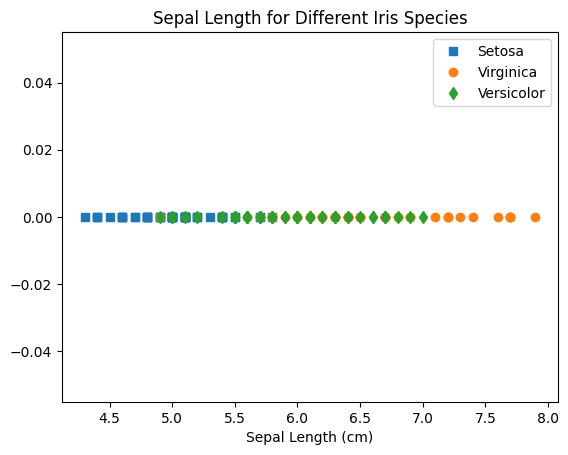

In [11]:
#Visualizing and comparing the sepal lengths of different species
import numpy as np
import matplotlib.pyplot as plt

# Subset the data for each species
setosa = iris_df[iris_df['species'] == 'setosa']
versicolor = iris_df[iris_df['species'] == 'versicolor']
virginica = iris_df[iris_df['species'] == 'virginica']

# Plot the sepal length (cm) for each species
plt.plot(setosa["sepal length (cm)"], np.zeros_like(setosa["sepal length (cm)"]), 's', label='Setosa')
plt.plot(virginica["sepal length (cm)"], np.zeros_like(virginica["sepal length (cm)"]), 'o', label='Virginica')
plt.plot(versicolor["sepal length (cm)"], np.zeros_like(versicolor["sepal length (cm)"]), 'd', label='Versicolor')

# Adding labels and legend
plt.xlabel('Sepal Length (cm)')
plt.title('Sepal Length for Different Iris Species')
plt.legend()
plt.show()



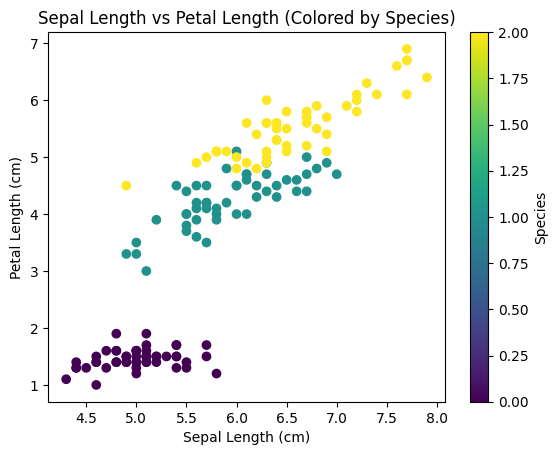

In [10]:
# Scatter plot to visualize sepal length vs. petal length, colored by species
plt.scatter(iris_df["sepal length (cm)"], iris_df["petal length (cm)"], c=iris.target, cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Sepal Length vs Petal Length (Colored by Species)")
plt.colorbar(label="Species")
plt.show()

In [5]:
# Exploratory Data Analysis (EDA) for more insights

# Calculating correlation between numerical features and visualize
print("\nCorrelation between features:")
print(correlation_matrix)

# Observing species-specific mean values for features
species_mean = iris_df.groupby('species').mean()
print("\nMean values of features by species:")
print(species_mean)

# Outlier detection (Interquartile Range Method)
Q1 = iris_df.iloc[:, :-1].quantile(0.25)
Q3 = iris_df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((iris_df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (iris_df.iloc[:, :-1] > (Q3 + 1.5 * IQR)))
print("\nOutliers detected in dataset (True indicates presence of an outlier):")
print(outliers.sum())



Correlation between features:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  

Mean values of features by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

     

<ipython-input-5-eef65bc4a50c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_mean = iris_df.groupby('species').mean()


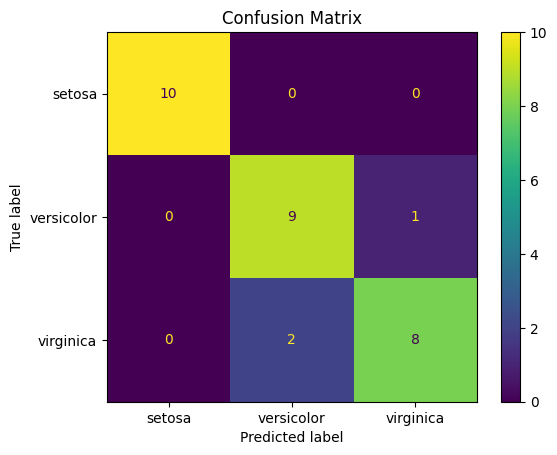


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Splitting the dataset into features (X) and target (y)
X = iris_df.iloc[:, :-1]  # All columns except 'species'
y = iris_df['species']  # The target column

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training a classification model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

# Printing a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
